<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,UpSampling2D,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array

In [15]:
np.random.seed(42)
img_data=[]

In [3]:
SIZE=256

In [13]:
img=cv2.imread('/content/monalisa2.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(SIZE,SIZE))

In [17]:
img_data.append(img_to_array(img))

In [20]:
img_array=np.reshape(img_data,(len(img_data),SIZE,SIZE,3))
img_array=img_array.astype('float32')/255.0

In [21]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))


model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3),activation='relu',padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 8)       

In [26]:
model.fit(img_array,img_array,epochs=20,shuffle=True)
pred=model.predict(img_array)

Epoch 1/20
1/1 [==============================] - 1s 516ms/step - loss: 0.0991 - accuracy: 0.5452
Epoch 2/20
1/1 [==============================] - 0s 414ms/step - loss: 0.0884 - accuracy: 0.5474
Epoch 3/20
1/1 [==============================] - 0s 385ms/step - loss: 0.0769 - accuracy: 0.5500
Epoch 4/20
1/1 [==============================] - 0s 393ms/step - loss: 0.0658 - accuracy: 0.5510
Epoch 5/20
1/1 [==============================] - 0s 401ms/step - loss: 0.0581 - accuracy: 0.5510
Epoch 6/20
1/1 [==============================] - 0s 388ms/step - loss: 0.0593 - accuracy: 0.5515
Epoch 7/20
1/1 [==============================] - 1s 594ms/step - loss: 0.0682 - accuracy: 0.5527
Epoch 8/20
1/1 [==============================] - 1s 744ms/step - loss: 0.0701 - accuracy: 0.5534
Epoch 9/20
1/1 [==============================] - 1s 727ms/step - loss: 0.0639 - accuracy: 0.5545
Epoch 10/20
1/1 [==============================] - 1s 688ms/step - loss: 0.0549 - accuracy: 0.5573
Epoch 11/20
1/1 [==

In [24]:
from matplotlib.pyplot import imshow

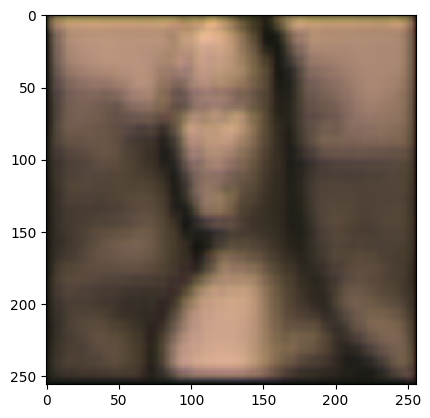

In [27]:
imshow(pred[0].reshape(SIZE,SIZE,3))